In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.palettes import Category20b_20
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, CategoricalColorMapper, HoverTool

from myTools import readDataset, episodePerDay, titlePerGenre, titleType, watchingHabit, mostWatchedGenre, busiestDay, mostWatchedType, scrapeBreakingBadRatings, scrapeHomelandRatings, heatMapBreakingBad, heatMapHomeland

output_notebook()

Loading BokehJS ...

In [2]:
netflixRaw = readDataset('datasets/NetflixViewingHistory.xlsx')
#display(netflixRaw)
netflix = netflixRaw.copy()
netflix['Date'] = pd.to_datetime(netflix['Date'])
display(netflix)

,Title,Date,Genre,Series / Movie
0,Dark: Season 3: The Origin,4/29/21,Drama,Series
1,Dark: Season 3: Adam and Eva,4/28/21,Drama,Series
2,Dark: Season 3: The Survivors,4/28/21,Drama,Series
3,Dark: Season 3: Deja-vu,4/26/21,Drama,Series
4,Dark: Season 2: Endings and Beginnings,4/26/21,Drama,Series
...,...,...,...,...
1375,The End of the F***ing World: Season 1: Episode 5,1/11/19,Comedy,Series
1376,The End of the F***ing World: Season 1: Episode 4,1/11/19,Comedy,Series
1377,The End of the F***ing World: Season 1: Episode 3,1/11/19,Comedy,Series
1378,The End of the F***ing World: Season 1: Episode 2,1/11/19,Comedy,Series


,Title,Date,Genre,Series / Movie
0,Dark: Season 3: The Origin,2021-04-29,Drama,Series
1,Dark: Season 3: Adam and Eva,2021-04-28,Drama,Series
2,Dark: Season 3: The Survivors,2021-04-28,Drama,Series
3,Dark: Season 3: Deja-vu,2021-04-26,Drama,Series
4,Dark: Season 2: Endings and Beginnings,2021-04-26,Drama,Series
...,...,...,...,...
1375,The End of the F***ing World: Season 1: Episode 5,2019-01-11,Comedy,Series
1376,The End of the F***ing World: Season 1: Episode 4,2019-01-11,Comedy,Series
1377,The End of the F***ing World: Season 1: Episode 3,2019-01-11,Comedy,Series
1378,The End of the F***ing World: Season 1: Episode 2,2019-01-11,Comedy,Series


In [9]:
netflixDailyCounts = episodePerDay(netflix)
netflixGenreCount = titlePerGenre(netflix)
netflixTypeCount = titleType(netflix)
#display(netflixDailyCounts, netflixGenreCount, netflixTypeCount) - Necessary to display?

In [4]:
watchingHabit(netflix)
# More interactivness -> Select titles, select genres. Maybe splitted into multiple graphs.

In [5]:
busiestDay(netflixRaw)

In [6]:
mostWatchedGenre(netflix)

In [7]:
mostWatchedType(netflix)

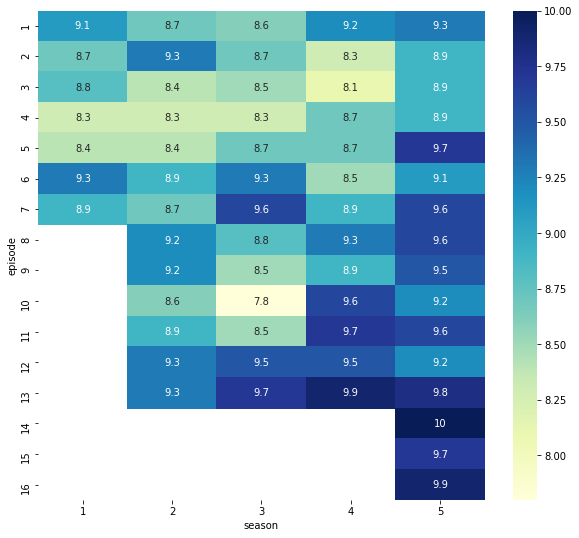

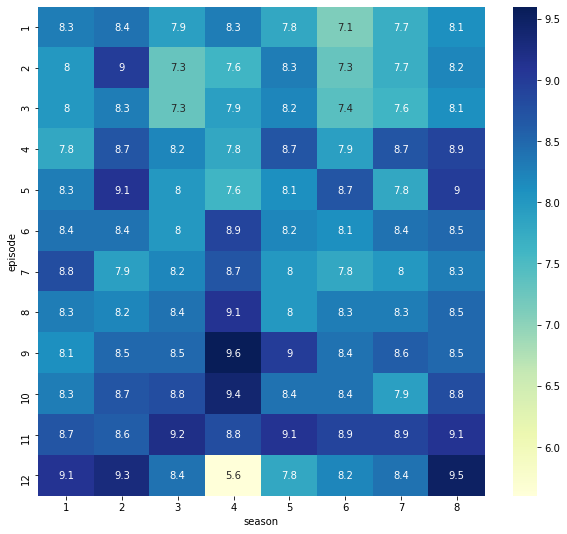

In [8]:
heatMapBreakingBad()
heatMapHomeland()

In [ ]:
# Heat map version of busiestDay() ! 

In [ ]:
# Try to create a similiar graph like the watchingHabit(), but y-axis is the spent minutes.